In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import sklearn
%matplotlib inline

In [8]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.24.2.


# Stuff for the begining

In [ ]:
df_cars = pd.read_csv('cars.csv')
df_cars

In [ ]:
df_cars.describe()

In [ ]:
df_cars.info()

In [ ]:
df_cars.nunique()

C:\Users\fuetu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


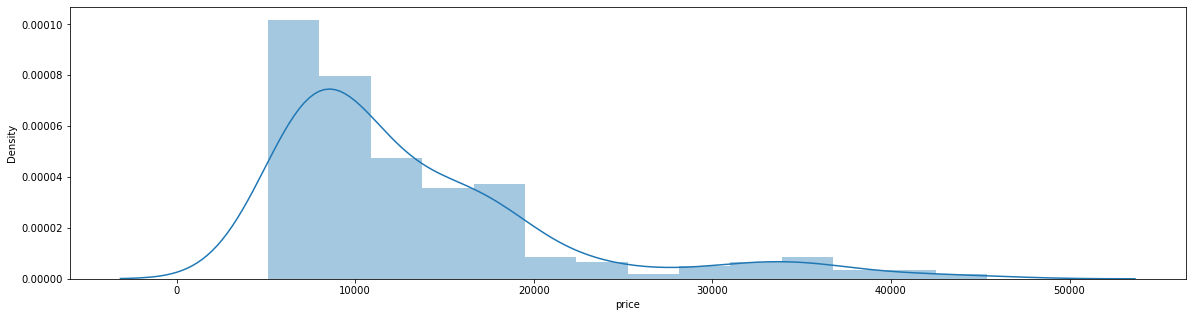

In [13]:
plt.figure(figsize=(20,5))
sns.distplot(df_cars['price'])
plt.show()

In [14]:
df_cars.CarName.nunique

<bound method IndexOpsMixin.nunique of 0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object>

In [15]:
import re

In [16]:
p = re.compile(r'\w+-?\w+')
df_cars['car_company'] = df_cars['CarName'].apply(lambda x: re.findall(p, x)[0])

In [73]:
df_cars

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company,cat_price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,medium
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,high
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,high
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,high
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,high
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,high
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,high
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,high


In [74]:
df_cars_no_id =df_cars.drop(['car_ID'], axis=1)
df_cars_no_id.shape

(205, 27)

In [19]:
df_cars_no_id = df_cars_no_id.drop_duplicates()
df_cars_no_id.shape

(205, 26)

In [20]:
df_meanprice = df_cars.groupby('CarName', as_index=False)['price'].mean()
df_meanprice['cat_price'] = pd.qcut(df_meanprice.price,q= 3,labels = ['cheap', 'medium', 'high'])
df_meanprice

,CarName,price,cat_price
0,Nissan versa,5499.0,cheap
1,alfa-romero Quadrifoglio,16500.0,high
2,alfa-romero giulia,13495.0,medium
3,alfa-romero stelvio,16500.0,high
4,audi 100 ls,13950.0,medium
...,...,...,...
142,volvo 246,22470.0,high
143,volvo 264gl,20522.5,high
144,volvo diesel,18950.0,high
145,vw dasher,11595.0,medium


In [21]:
df_cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'car_company'],
      dtype='object')

In [ ]:
df_cars['cat_price'] = pd.qcut(df_cars.price,q= 3,labels = ['cheap', 'medium', 'high'])
df_cars

# Ordinary Reglin

In [23]:
car_reglin = LinearRegression()
X = np.ones((len(df_cars), 2))
X[:, 1] = df_cars['curbweight']
Y = df_cars['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)

In [24]:
car_reglin.fit(X_train, Y_train)

LinearRegression()

In [25]:
# on regarde les resultats : Les coefficients
a = car_reglin.coef_
a = a[1]
b = car_reglin.intercept_
print('Les coefficients trouves sont: \n', 'a =', a, ' et b = ', b)




# Evaluation du training set
Y_train_predict = car_reglin.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
r2 = r2_score(Y_train, Y_train_predict)
'''
# affichage des resultats de performance
print('La performance du modele sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
'''


# model evaluation for training set
y_train_predict = car_reglin.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
mae = mean_absolute_error(Y_train, y_train_predict)
print("\nThe model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('Mean Absolut Error is {}'.format(mae))
print("\n")

# model evaluation for testing set
y_test_predict = car_reglin.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
mae = mean_absolute_error(Y_test, y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

print('Mean Absolut Error is {}'.format(mae))


Les coefficients trouves sont: 
 a = 12.582978838630023  et b =  -18970.49281249794

The model performance for training set
--------------------------------------
RMSE is 4248.302911449426
R2 score is 0.7038852996038018
Mean Absolut Error is 2758.974650214149


The model performance for testing set
--------------------------------------
RMSE is 4682.1646074536575
R2 score is 0.683584296334826
Mean Absolut Error is 2952.5016408263236


In [26]:
df_cars[['curbweight','price']] .describe()

,curbweight,price
count,205.000000,205.000000
mean,2555.565854,13276.710571
std,520.680204,7988.852332
min,1488.000000,5118.000000
25%,2145.000000,7788.000000
50%,2414.000000,10295.000000
75%,2935.000000,16503.000000
max,4066.000000,45400.000000


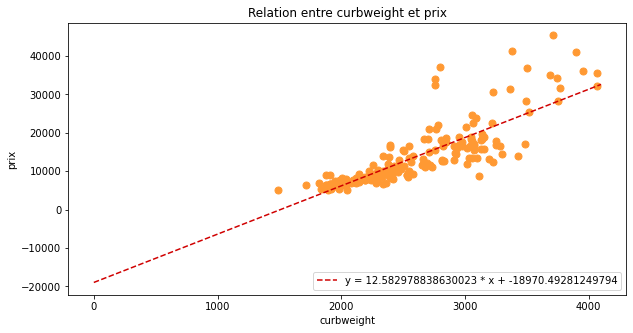

In [27]:
plt.figure(figsize=(10, 5))
plt.title("Relation entre curbweight et prix")
plt.xlabel('curbweight')
plt.ylabel('prix')
# parametrage de l'affichage du nuage de points :
plt.plot(df_cars['curbweight'], df_cars['price'],'ro', color = '#FF9933', markersize=7  )

# parametrage de l'affichage de la droite de regression linéaire de 0 à 2 :
plt.plot([0, 4100], [ b, b + (4100) * a], linestyle='--', c='#d00000' , label="y = {} * x + {}".format(a, b))

plt.legend(loc='lower right')


C:\Users\fuetu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


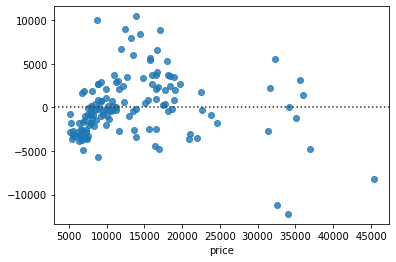

In [28]:
sns.residplot(Y_train, Y_train_predict)  
plt.show()

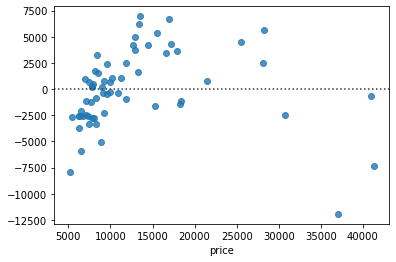

In [29]:
sns.residplot(Y_test, y_test_predict)  
plt.show()

# polynomial Reglin

In [30]:
from sklearn.preprocessing import PolynomialFeatures
car_reglin_poly = LinearRegression()
pf=PolynomialFeatures()     #Linear Equation of degree 2
X_poly=pf.fit_transform(X) 
X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size = 0.2, random_state=42)
car_reglin_poly.fit(X_train, Y_train)
y_predict =car_reglin_poly.predict(X_test)

In [31]:
# model evaluation for training set
y_train_predict = car_reglin_poly.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
mae = mean_absolute_error(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('Mean Absolut Error is {}'.format(mae))
print("\n")

# model evaluation for testing set
y_test_predict = car_reglin_poly.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
mae = mean_absolute_error(Y_test, y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

print('Mean Absolut Error is {}'.format(mae))

The model performance for training set
--------------------------------------
RMSE is 4271.204637187605
R2 score is 0.694100425965247
Mean Absolut Error is 2530.857319119502


The model performance for testing set
--------------------------------------
RMSE is 3959.939551925156
R2 score is 0.8013640415047325
Mean Absolut Error is 2465.1376134879742


# 2 Variables

In [46]:
car_reglin_2_var = LinearRegression()
X = df_cars[['curbweight','enginesize']]
Y = df_cars['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)
car_reglin_2_var.fit(X_train, Y_train)

LinearRegression()

In [33]:
# on regarde les resultats : Les coefficients
a = car_reglin_2_var.coef_
a = a[1]
b = car_reglin_2_var.intercept_
print('Les coefficients trouves sont: \n', 'a =', a, ' et b = ', b)


# model evaluation for training set
y_train_predict = car_reglin_2_var.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
mae = mean_absolute_error(Y_train, y_train_predict)
print("\nThe model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('Mean Absolut Error is {}'.format(mae))
print("\n")

# model evaluation for testing set
y_test_predict = car_reglin_2_var.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
mae = mean_absolute_error(Y_test, y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

print('Mean Absolut Error is {}'.format(mae))

Les coefficients trouves sont: 
 a = 110.58871117989337  et b =  -14025.969729843599

The model performance for training set
--------------------------------------
RMSE is 3457.549772917743
R2 score is 0.8038601227150541
Mean Absolut Error is 2473.4295056181386


The model performance for testing set
--------------------------------------
RMSE is 3948.040935290623
R2 score is 0.7750282597729271
Mean Absolut Error is 2616.95566228835


In [34]:
import pickle
filename = 'car_reglin_2_var.sav'
pickle.dump(car_reglin_2_var, open(filename, 'wb'))

# Stuff to check if it's working with the couple given by the client

In [49]:
# Name of the model feed : car_reglin_2_var
type(X.iloc[1])
X.iloc[0].shape
X_client = X.iloc[0]
X.iloc[2]

curbweight    2823
enginesize     152
Name: 2, dtype: int64

In [36]:
X_client = np.matrix(X_client)
X_client

matrix([[2548,  130]], dtype=int64)

In [50]:
X_client = np.matrix([2832,152])
X_client

matrix([[2832,  152]])

In [51]:
car_reglin_2_var.predict(X_client)

array([17517.97469596])

# 2 Variables Poly

In [39]:
car_reglin_2_var_poly = LinearRegression()
pf=PolynomialFeatures()     #Linear Equation of degree 2
X_poly=pf.fit_transform(X) 
X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size = 0.2, random_state=42)
car_reglin_2_var_poly.fit(X_train, Y_train)
y_predict =car_reglin_2_var_poly.predict(X_test)

In [40]:
# model evaluation for training set
y_train_predict = car_reglin_2_var_poly.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
mae = mean_absolute_error(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('Mean Absolut Error is {}'.format(mae))
print("\n")

# model evaluation for testing set
y_test_predict = car_reglin_2_var_poly.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
mae = mean_absolute_error(Y_test, y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

print('Mean Absolut Error is {}'.format(mae))

The model performance for training set
--------------------------------------
RMSE is 3526.9816463533575
R2 score is 0.791414308785239
Mean Absolut Error is 2481.279605954398


The model performance for testing set
--------------------------------------
RMSE is 3733.849085350854
R2 score is 0.8233985444771297
Mean Absolut Error is 2532.788346223695


C:\Users\fuetu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


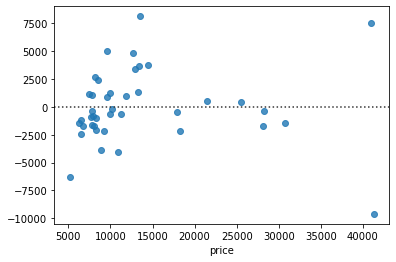

In [41]:
sns.residplot(Y_test, y_test_predict)  
plt.show()

# Save model

In [42]:
import pickle
filename = 'car_reglin_2_var_poly.sav'
pickle.dump(car_reglin_2_var_poly, open(filename, 'wb'))

In [43]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)
y_test_predict = loaded_model.predict(X_test)

In [44]:
print(r2_score(Y_test, y_test_predict))

0.8233985444771297


In [45]:
df_cars[['curbweight','enginesize']].describe()

,curbweight,enginesize
count,205.000000,205.000000
mean,2555.565854,126.907317
std,520.680204,41.642693
min,1488.000000,61.000000
25%,2145.000000,97.000000
50%,2414.000000,120.000000
75%,2935.000000,141.000000
max,4066.000000,326.000000


# Dataframe for all features

In [ ]:
df_cars

In [ ]:
for i in df_cars.columns:
    print(i,df_cars[i].unique())

In [83]:
df_cars['CarNames']
df_cars['CarName'].replace({'romero':'romeo' ,'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'},inplace = True)
p = re.compile(r'\w+-?\w+')
df_cars['car_company'] = df_cars['CarName'].apply(lambda x: re.findall(p, x)[0])



In [84]:
df_cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company,cat_price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,medium
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,high
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,high
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,high
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,high


In [95]:
df_cars['CarName'] = df_cars['CarName'].astype(str)
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   car_ID            205 non-null    int64   
 1   symboling         205 non-null    int64   
 2   CarName           205 non-null    object  
 3   fueltype          205 non-null    object  
 4   aspiration        205 non-null    object  
 5   doornumber        205 non-null    object  
 6   carbody           205 non-null    object  
 7   drivewheel        205 non-null    object  
 8   enginelocation    205 non-null    object  
 9   wheelbase         205 non-null    float64 
 10  carlength         205 non-null    float64 
 11  carwidth          205 non-null    float64 
 12  carheight         205 non-null    float64 
 13  curbweight        205 non-null    int64   
 14  enginetype        205 non-null    object  
 15  cylindernumber    205 non-null    object  
 16  enginesize        205 non-